# Data Augmentation Example

### Crop Random → (Rotate 90°, Flip Vertical, Flip Horizontal)→ Resize → repeat ×50:


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
img1 = cv2.imread('./image/ISIC_0000000.jpg', 1)
img2 = cv2.imread('./image/ISIC_0000000.jpg', 0)

In [3]:
b,g,r = cv2.split(img1)
col_img = cv2.merge((r,g,b))
col_img.shape

(767, 1022, 3)

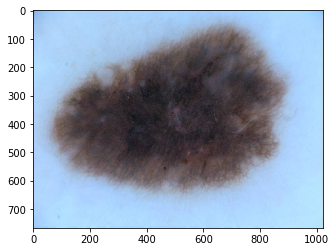

In [4]:
plt.imshow(col_img)
plt.show()

## Crop Random

In [5]:
num_img = 10
crop_img = []
for i in range(num_img):
    ran_x = random.randrange(1,767-200)
    ran_y = random.randrange(1,1022-200)
    crop = col_img[ran_x:ran_x+200, ran_y:ran_y+200]
    crop_img.append(crop)

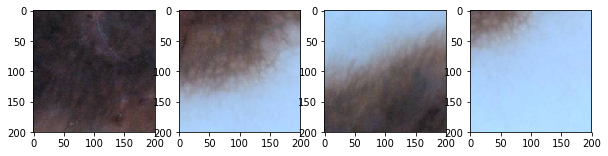

In [6]:
for i in range(4):
    plt.figure(1,figsize=(10,10))
    plt.subplot(1,4,i+1), plt.imshow(crop_img[i])
plt.show()

# Rotate 90°

### cv2.getRotationMatrix2D (center, angle, scale)
- center – Center of the rotation in the source image.
- angle – Rotation angle in degrees. Positive values mean counter-clockwise rotation.
- scale – Isotropic scale factor.

### cv2.warpAffinecv (src, M, [cols, rows])
- src – input image.
- M - 2 X 3 transformation matrix.

In [7]:
rotate_img = []
for i in range(num_img):  
    rows, cols, _ = crop_img[i].shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
    dst = cv2.warpAffine(crop_img[i], M, (cols,rows))
    rotate_img.append(dst)

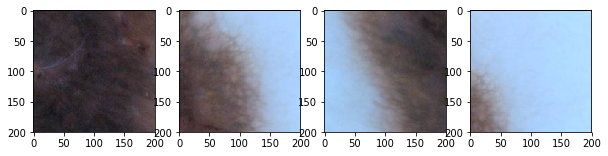

In [8]:
for i in range(4):
    plt.figure(1,figsize=(10,10))
    plt.subplot(1,4,i+1), plt.imshow(rotate_img[i])
plt.show()

##  Flip Vertical or Horizontal

#### cv2.flip (src, direction)
- src - input image.
- direction – Vertical or Horizontal.

### Flip Vertical code

In [9]:
flip_ver_img = []
for i in range(num_img):
    f_img = cv2.flip(crop_img[i],1)
    flip_ver_img.append(f_img)

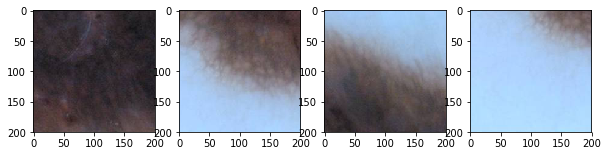

In [10]:
for i in range(4):
    plt.figure(1,figsize=(10,10))
    plt.subplot(1,4,i+1), plt.imshow(flip_ver_img[i])
plt.show()

### Flip Horizontal code

In [11]:
flip_hor_img = []
for i in range(num_img):
    f_img = cv2.flip(crop_img[i],0)
    flip_hor_img.append(f_img)

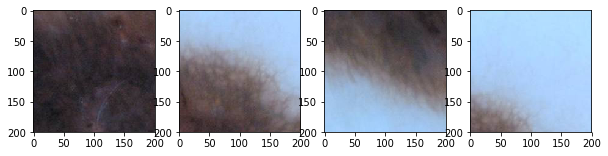

In [12]:
for i in range(4):
    plt.figure(1,figsize=(10,10))
    plt.subplot(1,4,i+1), plt.imshow(flip_hor_img[i])
plt.show()

## Resize

#### cv2.resize (src, dsize)

- src - input image.
- dsize - output image.

In [13]:
resize_img= []
for i in range(num_img):
    a = cv2.resize(crop_img[i],(28,28))
    b = cv2.resize(rotate_img[i],(28,28))
    c = cv2.resize(flip_ver_img[i],(28,28))
    d = cv2.resize(flip_hor_img[i],(28,28))
    resize_img.append([a,b,c,d])
resize_img[1][3].shape

(28, 28, 3)

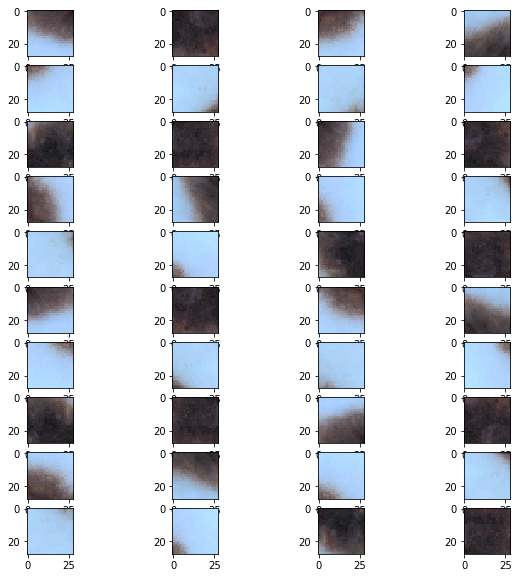

In [15]:
batch = 10
f_num = 0
s_num = 0
for i in range(40):
    f_num = i % batch - 1
    s_num = i // batch
#     img_s = resize_img[f_num][i]
#     img_h = np.hstack((img_s,resize_img[f_num][s_num]))
#     plt.imshow(img_h)
    plt.figure(1,figsize=(10,10))
    plt.subplot(10,4,i+1), plt.imshow(resize_img[f_num][s_num])
plt.show()